In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD016057MS3" # Indicate Dataset Here
# "MSV000086809", "PXD027742", "MSV000086004", "PXD016573", "PXD016057_and_PXD017626", "PXD020586", "MSV000085959"

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

sdrf_df["label"] = sdrf_df["label"].astype(str)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

all_channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N","134C","135N"]

channels = []

info_dict = {}
for dataset in datasets:
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]

first_info_df = info_dict[datasets[0]]
first_info_df.reset_index(drop=True, inplace=True)

for channel in all_channels:
    if first_info_df.index[first_info_df["label"] == channel].tolist():
        row = first_info_df.index[first_info_df["label"] == channel].tolist()[0]
        channel_type = first_info_df["type"].iloc[row]
        if (channel_type == "single"):
            channels.append(channel)
            
psm_df['Median'] = psm_df[channels].median(axis=1)

# psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=channels)

# data_dict = {}
# for dataset in datasets:
#     data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    

print(channels)
# channels = ["127N","128N","128C","129N","129C","130N","130C"] # ,"131N","131C","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because reasons

# medians_df = pd.DataFrame(index=datasets, columns=channels)


# for dataset in datasets:
#     curr_df =  data_dict[dataset]
#     for channel in channels:
#         chan_df = curr_df.loc[curr_df["variable"] == channel]
#         medians_df.at[dataset, channel] = chan_df['value'].median()
        
# medians_df['Median'] = medians_df[channels].median(axis=1)

psm_df = psm_df[psm_df["Median"] != 0] # Drops any spectra with a zero median

psm_df
# sdrf_df
# first_info_df
# medians_df


# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

['126', '127N', '127C', '128N', '128C', '129N', '129C', '130C']


,Spectrum,Spectrum File,Peptide,Modified Peptide,Extended Peptide,Prev AA,Next AA,Peptide Length,Charge,Retention,...,127C,128N,128C,129N,129C,130N,130C,131N,File_Name,Median
31,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,TAAAAAEHSQR,n[230]TAAAAAEHSQR,STGEADGK.TAAAAAEHSQR.EIDTVTIE,K,E,11,3,1159.2778,...,205.1057,277.8409,238.0737,302.8799,182.6642,8002.0215,220.9834,190234.6250,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,245.84275
38,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,EDTEEHHLR,n[230]EDTEEHHLR,KIFVGGIK.EDTEEHHLR.DYFEEYGK,K,D,9,3,1179.0249,...,994.5104,865.6607,1234.7240,952.6383,1095.5636,9975.6982,1251.9585,212994.5625,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,973.57435
66,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,SGTHNMYR,n[230]SGTHNMYR,IWIRYDSR.SGTHNMYR.EYRDITTA,R,E,8,3,1245.2134,...,182.0835,0.0000,219.4120,291.7847,204.6400,8881.4092,357.6129,230161.9531,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,212.02600
68,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,VYSGHQGR,n[230]VYSGHQGR,AVIGDVIR.VYSGHQGR.TIIFCETK,R,T,8,3,1247.1516,...,410.0908,184.2466,195.8034,0.0000,254.1512,3449.2227,338.2353,101976.4609,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,190.02500
80,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,GGSDGYGSGR,n[230]GGSDGYGSGR,PGPGSNFR.GGSDGYGSGR.GFGDGYNG,R,G,10,2,1260.7214,...,1081.3508,941.9213,1035.1741,963.7874,994.3040,11728.2412,1581.6249,245840.5938,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,979.04570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,LLGNVLVCVLAHHFGK,n[230]LLGNVLVCVLAHHFGK,HVDPENFR.LLGNVLVCVLAHHFGK.EFTPPVQA,R,E,16,4,6281.8318,...,11569.1221,10422.9941,5926.9780,7871.4409,3861.9429,5869.9800,20913.3867,5308.5298,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,6899.20945
5259,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,LLGNVLVCVLAHHFGK,n[230]LLGNVLVCVLAHHFGK,HVDPENFR.LLGNVLVCVLAHHFGK.EFTPPVQA,R,E,16,4,6374.4379,...,29704.8262,23354.2383,15717.7891,16936.3965,10210.7305,14623.5264,48153.5195,10521.4971,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,16327.09280
5260,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,LLGNVLVCVLAHHFGK,n[230]LLGNVLVCVLAHHFGK,HVDPENFR.LLGNVLVCVLAHHFGK.EFTPPVQA,R,E,16,4,6421.1224,...,24498.3340,19449.3086,12591.7734,14266.2500,7009.5801,10039.6807,43633.9883,10915.7617,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,13429.01170
5262,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,C:\Users\Isengard\MassSpec\ProteinQuantData\PX...,LLGNVLVCVLAHHFGK,n[230]LLGNVLVCVLAHHFGK,HVDPENFR.LLGNVLVCVLAHHFGK.EFTPPVQA,R,E,16,4,6516.9649,...,21952.6348,19256.8633,12197.9854,13003.7090,8085.1831,9662.6855,39041.2695,9031.1553,01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug1...,12600.84720


In [2]:
variance_df = psm_df.set_index("Spectrum")


for spectrum in psm_df["Spectrum"]:
    for channel in channels:
        variance_df.at[spectrum, channel] = variance_df.at[spectrum, channel] / variance_df.at[spectrum, "Median"]

variance_df = variance_df[channels]

sigma = np.nanstd(variance_df[channels])
mean = np.nanmean(variance_df[channels])
print(sigma)
print(mean)

for index in psm_df.iterrows():
    for channel in channels:
        curr_col = variance_df[channel]
        variance_df = variance_df[(curr_col <= mean+(5*sigma))]
        
#         if (variance_df.at[index, channel] > mean+(5*sigma)): 
#             variance_df.at[index, channel] = np.nan
            
        
variance_df
# variance_df.to_csv("variance.csv")

1.3718087837508017
1.2632399692408214


,126,127N,127C,128N,128C,129N,129C,130C
Spectrum,,,,,,,,
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.05118.05118.3,1.234563,1.031602,0.834296,1.130157,0.968398,1.232007,0.743012,0.898881
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.05210.05210.3,0.937268,0.428638,1.021504,0.889157,1.268238,0.978496,1.125300,1.285940
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.05517.05517.3,1.185732,0.000000,0.858779,0.000000,1.034835,1.376174,0.965165,1.686646
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.05526.05526.3,0.926618,0.000000,2.158089,0.969591,1.030409,0.000000,1.337462,1.779952
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.05588.05588.2,0.474900,0.882599,1.104495,0.962081,1.057330,0.984415,1.015585,1.615476
...,...,...,...,...,...,...,...,...
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.30363.30363.4,0.660657,0.602418,1.676876,1.510752,0.859081,1.140919,0.559766,3.031273
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.30795.30795.4,0.720525,0.624051,1.819358,1.430398,0.962681,1.037319,0.625386,2.949302
01ng_boost1000_TMT_AMLcell_spsMS3_lumos_11Aug19_Pippin_REP-19-07-14.31012.31012.4,0.700727,0.531050,1.824284,1.448305,0.937655,1.062345,0.521973,3.249233


In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

# variance_df["Injection Time"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume # PROBLEM LINE
    
variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
counts_df = pd.DataFrame(index=["Above","Below", "Average", "St Dev"], columns=channels)

for channel in channels:
    column = variance_df[channel]
    counts_df.at["Above", channel] = column[column > 1.00].count()
    counts_df.at["Below", channel] = column[column < 1.00].count()
    counts_df.at["Average", channel] = column.mean()
    counts_df.at["St Dev", channel] = column.std()
    
counts_df

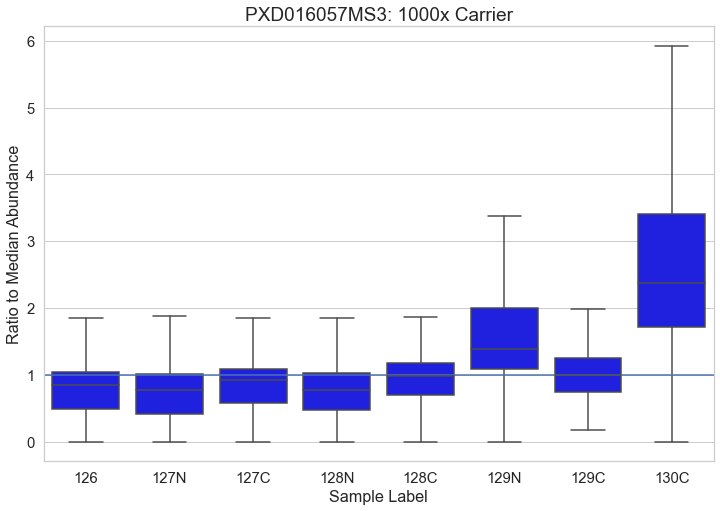

In [5]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume"], value_vars=channels, ignore_index=False) # ,"131N","131C","132N","132C","133N","133C","134N"]
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 8)) # Original: (16, 8.27)

sns.set(font_scale=1.35)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.boxplot(data=to_graph_df, x="variable", y="value", order=channels, color="blue", showfliers=False)
else:
    title = "Optimizing Accuracy and Depth of Protein Quantification in Experiments Using Isobaric Carriers"    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", s=10, 
                     order=channels)
    
    plt.legend(title="Carrier Volume\n       (Cells)", fontsize='large', title_fontsize='20') # , alignment="center") # Need to Update matplotlib
    
boxplot.set_title(title, fontsize=19)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()